#**Topic: Naive Bayes Classifier & Feature Selection**

#Part 1: Load & Preprocess Data

**Install & Import Libraries**

In [4]:
# Install required library
!pip install nltk


In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras.datasets import imdb


**Download NLTK Data**

In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#The dataset mentioned in the worksheet was not available in the shared drive.
#Therefore, a publicly available IMDB dataset from Keras was used to complete
#the Naive Bayes sentiment analysis task while following the same objectives.


#**Exercise 1: Naive Bayes – Sentiment Analysis**
**Dataset Used from IMDB dataset from Keras**


**Load IMDB Dataset**

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


**Convert Numbers to Text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in review])

X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Text Preprocessing**

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

X_train_clean = [preprocess(review) for review in X_train_text]
X_test_clean = [preprocess(review) for review in X_test_text]


**Bag-of-Words + Naive Bayes**

In [10]:
vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

**Model Evaluation**

In [11]:
y_pred = nb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_prob = nb_model.predict_proba(X_test_vec)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)


Accuracy: 0.83416

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84     12500
    Positive       0.86      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000


Confusion Matrix:
[[10798  1702]
 [ 2444 10056]]

ROC-AUC Score: 0.9029163136


**Confusion Matrix Heatmap**

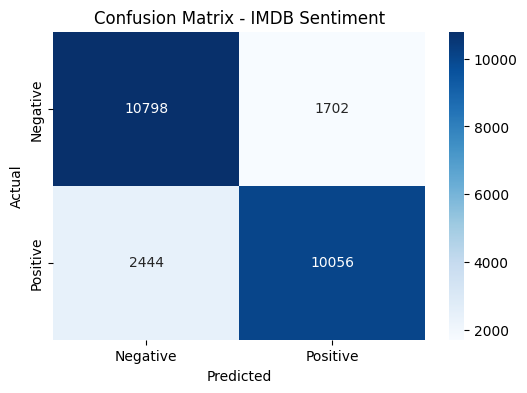

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IMDB Sentiment")
plt.show()




Q1. Why Naive Bayes for text?
-> Fast, works well with Bag-of-Words, good for high-dimensional data.

Q2. What does Bag-of-Words do?
-> Converts text into numeric word frequency vectors.

Q3. Meaning of ROC-AUC?
-> Measures how well the model separates positive and negative classes.

#**Exercise 2: Feature Selection (Wrapper Method – RFE)**

#Dataset Used

#Breast Cancer Dataset (sklearn)

#Load & EDA

In [13]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(X.describe())
print("Missing values:\n", X.isnull().sum())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

#Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Part 2: RFE with Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=500)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features: Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


#Feature Ranking Visualization

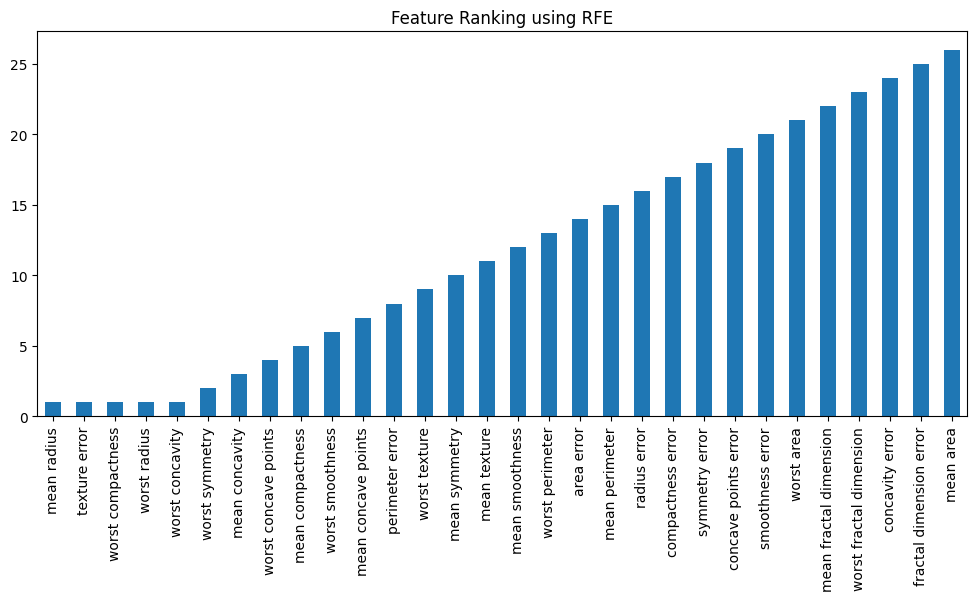

In [16]:
ranking = pd.Series(rfe.ranking_, index=X.columns)
ranking.sort_values().plot(kind='bar', figsize=(12,5))
plt.title("Feature Ranking using RFE")
plt.show()


#Part 3: Model Evaluation

#Using Selected Features

In [17]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_sel))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC-AUC: 0.969701932525385


#Part 4: Experiment (Top 3 & Top 7)

In [18]:
for n in [3, 7]:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    features = X.columns[rfe.support_]

    model.fit(X_train[features], y_train)
    preds = model.predict(X_test[features])

    print(f"\nTop {n} Features Accuracy:", accuracy_score(y_test, preds))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 3 Features Accuracy: 0.8070175438596491


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 7 Features Accuracy: 0.9736842105263158




Using fewer important features can:

Reduce overfitting

Improve interpretability

Too few features → underfitting

Optimal feature count gives best performance